In [50]:
import pandas as pd
from category_encoders import TargetEncoder

from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1. Preliminary Data Analysis

In [3]:
bad_users_data = pd.read_csv('dataset/ya_practicum_bad_users_info.csv')
good_users_data = pd.read_csv('dataset/ya_practicum_good_users_info.csv')
bad_users_event_data =pd.read_csv('dataset/ya_practicum_ltv_bad_users_events_dataset.csv')
good_users_event_data = pd.read_csv('dataset/ya_practicum_ltv_good_users_events_dataset.csv')

In [4]:
bad_users_data.info()
bad_users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134177 entries, 0 to 134176
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             134177 non-null  object 
 1   channel                       134177 non-null  object 
 2   first_month_price             134177 non-null  float64
 3   email_domain                  134177 non-null  object 
 4   first_payment_type            106437 non-null  object 
 5   subscription_platform         134177 non-null  object 
 6   signup_platform               116570 non-null  object 
 7   fragrance_family              4665 non-null    object 
 8   scent_profile_title           4665 non-null    object 
 9   shipping_region               134177 non-null  object 
 10  shipping_city                 134177 non-null  object 
 11  is_upgraded_in_first_2_days   134177 non-null  bool   
 12  is_upcharged_in_first_2_days  134177 non-nul

,subscription_hash,channel,first_month_price,email_domain,first_payment_type,subscription_platform,signup_platform,fragrance_family,scent_profile_title,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,minutes_from_registration,subscription_lifetime,age_tier,sex,income_tier
0,6c6f36cd8eb42ef1d905578a6b0947f534d6132ae1c025...,Channel_3,3.00,0a208c9bd58a3c4a8afd770de83f090fdf74a53de73252...,Card,web,web,NaN,NaN,FL,SPRING HILL,False,False,3,2,45 to 54,female,25 to 49
1,73831634ef6d3639546fbb58f7ea4288220d907600fc9b...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,Card,web,web,NaN,NaN,PA,PHILADELPHIA,False,True,3,2,Below 18,male,50 to 74
2,75c705c4e9d81bb6037d2383118983f1f8009b6ae203d4...,Channel_1,11.21,b18226564f0740bc4e0785d34af8d56c85e278d32e321d...,NaN,web,web,NaN,NaN,IN,FRANKFORT,False,True,2,1,Below 18,female,25 to 49
3,20bb89aa63a1bc2a2f0c6e435a1da9057e52b6eec113fb...,Channel_3,3.00,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,Card,web,web,NaN,NaN,TX,DENTON,False,False,3,1,Below 18,female,25 to 49
4,160647d08b5d29ad4039b58f0c8f6515c29cdc7aae517e...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,NaN,NaN,TX,CONROE,True,False,2,2,Below 18,female,25 to 49


In [5]:
good_users_data.info()
good_users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134177 entries, 0 to 134176
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             134177 non-null  object 
 1   channel                       134177 non-null  object 
 2   first_month_price             134177 non-null  float64
 3   email_domain                  134177 non-null  object 
 4   first_payment_type            67889 non-null   object 
 5   subscription_platform         134177 non-null  object 
 6   signup_platform               124801 non-null  object 
 7   fragrance_family              17952 non-null   object 
 8   scent_profile_title           17952 non-null   object 
 9   shipping_region               134177 non-null  object 
 10  shipping_city                 134177 non-null  object 
 11  is_upgraded_in_first_2_days   134177 non-null  bool   
 12  is_upcharged_in_first_2_days  134177 non-nul

,subscription_hash,channel,first_month_price,email_domain,first_payment_type,subscription_platform,signup_platform,fragrance_family,scent_profile_title,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,minutes_from_registration,subscription_lifetime,age_tier,sex,income_tier
0,b856551ab1ffb13ccf08240d0ed14ed5d8c3103caf74b8...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Aromatic fruity, Citrus, Fougere fresh, Watery","Fresh, clean & comfortable",TX,HAMLIN,False,False,5,3,Below 18,male,25 to 49
1,639ec598c19dd1d12d0a91b6b61372f7af16e914d58254...,Channel_1,11.21,b18226564f0740bc4e0785d34af8d56c85e278d32e321d...,NaN,web,web,"Citrus, Floral rose, Floral watery","Fresh, sophisticated & floral",IN,AVON,False,False,7,3,Below 18,female,25 to 49
2,7bbe9554c2302fb6c30160ad265a0afe490763e27de83a...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Oriental Gourmand, Fruity","Sweet, creamy & comfortable",MO,MARYLAND HTS,False,False,2356,3,Below 18,female,25 to 49
3,4fb51b0b63f28246533b97a24df7eddb409f45b1e9c2c5...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Oriental Floral, Oriental Gourmand, Fruity","Warm, sweet & addictive",NY,BROOKLYN,True,False,8482,3,Below 18,female,50 to 74
4,0c969a59b134670997264eee28c1dd167d4b58f1d7006b...,Channel_1,11.21,86f85e9b7d3452597f1ac38acf948196a58ac22cdba276...,NaN,web,web,"Chypre, Woody spicy","Distinct, sensual & assertive",TN,MEMPHIS,False,False,2,4,Below 18,male,25 to 49


In [6]:
bad_users_event_data.info()
bad_users_event_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938129 entries, 0 to 938128
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   subscription_hash          938129 non-null  object
 1   minutes_from_registration  938129 non-null  int64 
 2   browser_name               938129 non-null  object
 3   browser_family             938129 non-null  object
 4   browser_type               938129 non-null  object
 5   browser_language           634387 non-null  object
 6   os_name                    938129 non-null  object
 7   event_name                 938129 non-null  object
 8   amount_of_events           938129 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 64.4+ MB


,subscription_hash,minutes_from_registration,browser_name,browser_family,browser_type,browser_language,os_name,event_name,amount_of_events
0,5861c3adb9e76ecf95899b8e6b4dfa781ade004723bb0e...,3,Mobile Safari,Safari,Browser (mobile),en-US,Mac OS X (iPhone),page_view,9
1,c193493aa3f5c042329943b77eead40745da259ddcfaf8...,5,Apple WebKit,Apple WebKit,Browser,en-US,Mac OS X (iPhone),page_view,9
2,65ad0f082dba1787ba9077bd51f83f2e8c8c2fa2a9f48b...,315,Chrome Mobile,Chrome,Browser (mobile),en-US,Android Mobile,page_view,3
3,4d306d031dc47e5b7a08fa77d8f9061720a32428846e12...,140,Chrome Mobile,Chrome,Browser (mobile),en-US,Android 8.x,page_view,1
4,2748d9b800754a161f0a88f054ed35a16a6433dcb46eb4...,1,Mobile Safari,Safari,Browser (mobile),en-US,Mac OS X (iPhone),page_view,17


In [7]:
good_users_event_data.info()
good_users_event_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853744 entries, 0 to 853743
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   subscription_hash          853744 non-null  object
 1   minutes_from_registration  853744 non-null  int64 
 2   browser_name               853744 non-null  object
 3   browser_family             853744 non-null  object
 4   browser_type               853744 non-null  object
 5   browser_language           582863 non-null  object
 6   os_name                    853744 non-null  object
 7   event_name                 853744 non-null  object
 8   amount_of_events           853744 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 58.6+ MB


,subscription_hash,minutes_from_registration,browser_name,browser_family,browser_type,browser_language,os_name,event_name,amount_of_events
0,29c44b6e797453abc7a8329e58e30a9f074c81759ed3f8...,3,Unknown,Unknown,unknown,NaN,Unknown,AddToQueue,4
1,2fd1f74ba5b919e484c82eeceb3faf051e8b959c528d28...,0,Chrome,Chrome,Browser,en-US,Windows 10,page_view,2
2,abfebc37c1b0eac7b1f3e3e0eedd72a4d98fb149763e58...,5,Mobile Safari,Safari,Browser (mobile),en-US,iOS 11 (iPhone),page_view,1
3,ba3fa8f9eeb9dad93e96ed33025cc815c663d209403994...,2524,Chrome,Chrome,Browser,en-US,Windows 10,page_view,3
4,dfd42ab97f28db264c2d84fb63d0ede3a4ad5f7dfae2f6...,15,Mobile Safari,Safari,Browser (mobile),es-XL,Mac OS X (iPhone),page_view,5


In [8]:
bad_users_data.groupby(['subscription_platform']).size()

subscription_platform
Android         8
iOS            10
web        134159
dtype: int64

In [9]:
bad_users_data.groupby(['signup_platform']).size()

signup_platform
Android        18
iOS            20
web        116532
dtype: int64

## Determining Features

In [10]:
bad_users_data.groupby(['sex']).size()

sex
female    106432
male       27745
dtype: int64

In [11]:
good_users_data.groupby(['sex']).size()

sex
female    103272
male       30905
dtype: int64

A quick glance at our datasets show a plethora of features. Let's decide which ones to include, and which to exclude.

### To Include

- **channel**: marketing channel is an important metric
- **first_month_price**: this probably has an impact on customer LTV
- **shipping_region** : probably has an impact on customer LTV, whether direct or indirect. Some examples I can think of is region's shipping cost or sales tax, and region's climate(resulting in frequency of fragrance use)
- **shipping_city** : same as above
- **is_upgraded_in_first_2_days** : cost is a useful metric
- **is_upcharged_in_first_2_days** : same as above
- **age_tier**: useful categorical variable
- **income_tier**: another useful categorical variable

### To exclude

- **subscription_hash**: primary key(customer identifier)
- **email_domain**: irrelevant data for our model
- **first_payment_type**: probably won't impact our model
- **subscription_platform**: almost 100% of users subscribe through web, so this is a useless metric.
- **signup_platform**: same as subscription_platform.
- **fragrance_family**: too little data, most are NaN
- **scent_profile_title**: same reason as fragrance_family
- **minutes_from_registration**: not sure why this matters
- **subscription_lifetime**: this metric is just used to categorize our data as good/bad.
- **sex**: the proportion of males to females in our good/bad data is virtually identical - including sex won't be very useful in our model, unless we can determine it's a confounding variable for another metric, in which case we'll combine the two metrics to create a more useful feature.

We'll add event data in a future iteration of the model; amount of events may be a useful metric.

# 2. Data Preparation

In [12]:
#create our target column
bad_users_data['target'] = 0
good_users_data['target'] = 1

#concatenate the data
full_data = pd.concat([bad_users_data, good_users_data], ignore_index=True)
#check
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268354 entries, 0 to 268353
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subscription_hash             268354 non-null  object 
 1   channel                       268354 non-null  object 
 2   first_month_price             268354 non-null  float64
 3   email_domain                  268354 non-null  object 
 4   first_payment_type            174326 non-null  object 
 5   subscription_platform         268354 non-null  object 
 6   signup_platform               241371 non-null  object 
 7   fragrance_family              22617 non-null   object 
 8   scent_profile_title           22617 non-null   object 
 9   shipping_region               268354 non-null  object 
 10  shipping_city                 268354 non-null  object 
 11  is_upgraded_in_first_2_days   268354 non-null  bool   
 12  is_upcharged_in_first_2_days  268354 non-nul

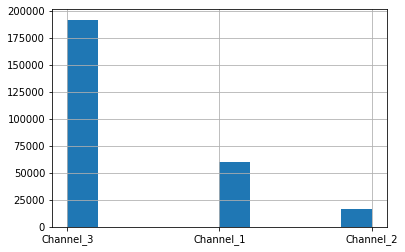

In [14]:
#check for abnormalities
full_data['channel'].hist()

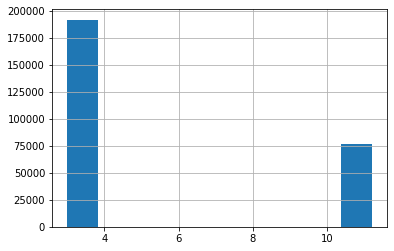

In [15]:
#check for abnormalities
full_data['first_month_price'].hist()

In [30]:
features = ['channel', 'first_month_price', 
            'shipping_region', 'shipping_city', 'is_upgraded_in_first_2_days', 'is_upcharged_in_first_2_days',
           'age_tier', 'income_tier']
unused_features = ['subscription_hash', 'email_domain', 'first_payment_type', 'subscription_platform', 'signup_platform', 
                   'fragrance_family', 'scent_profile_title', 'minutes_from_registration', 'subscription_lifetime', 'sex']

ml_data = full_data.drop(unused_features, axis=1)
ml_data.info()
ml_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268354 entries, 0 to 268353
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   channel                       268354 non-null  object 
 1   first_month_price             268354 non-null  float64
 2   shipping_region               268354 non-null  object 
 3   shipping_city                 268354 non-null  object 
 4   is_upgraded_in_first_2_days   268354 non-null  bool   
 5   is_upcharged_in_first_2_days  268354 non-null  bool   
 6   age_tier                      268354 non-null  object 
 7   income_tier                   268354 non-null  object 
 8   target                        268354 non-null  int64  
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 14.8+ MB


,channel,first_month_price,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,age_tier,income_tier,target
0,Channel_3,3.00,FL,SPRING HILL,False,False,45 to 54,25 to 49,0
1,Channel_1,11.21,PA,PHILADELPHIA,False,True,Below 18,50 to 74,0
2,Channel_1,11.21,IN,FRANKFORT,False,True,Below 18,25 to 49,0
3,Channel_3,3.00,TX,DENTON,False,False,Below 18,25 to 49,0
4,Channel_1,11.21,TX,CONROE,True,False,Below 18,25 to 49,0


In [31]:
#convert categorical to numerical
categorical = ['channel', 'shipping_region', 'shipping_city', 'age_tier', 'income_tier']

#using target encoding instead of OHE due to number of categories in shipping_region and shipping_city
target_encoder = TargetEncoder(cols=categorical, return_df=True)
ml_data = target_encoder.fit_transform(ml_data, ml_data['target'])
ml_data.head()

,channel,first_month_price,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,age_tier,income_tier,target
0,0.5,3.00,0.480265,0.475862,False,False,0.555615,0.508916,0
1,0.5,11.21,0.500485,0.538149,False,True,0.498363,0.493892,0
2,0.5,11.21,0.502563,0.594340,False,True,0.498363,0.508916,0
3,0.5,3.00,0.496840,0.449275,False,False,0.498363,0.508916,0
4,0.5,11.21,0.496840,0.506098,True,False,0.498363,0.508916,0


In [39]:
#split train and test
df_train, df_test = train_test_split(ml_data, test_size=0.25, random_state=12345)

features_train = df_train.drop('target', axis=1)
target_train = df_train['target']

features_test = df_test.drop('target', axis=1)
target_test = df_test['target']

In [41]:
#scale numeric features
numeric = ['first_month_price']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()

,channel,first_month_price,shipping_region,shipping_city,is_upgraded_in_first_2_days,is_upcharged_in_first_2_days,age_tier,income_tier
147251,0.5,1.583998,0.500753,0.486193,False,False,0.498363,0.461452
223343,0.5,1.583998,0.480265,0.622222,False,False,0.498363,0.508916
184988,0.5,-0.631314,0.507882,0.450000,False,False,0.498363,0.508916
263985,0.5,-0.631314,0.512033,0.333333,False,False,0.498363,0.508916
59353,0.5,1.583998,0.467341,0.525424,False,False,0.498363,0.461452


# 3. Testing Models

In [56]:
model = LogisticRegression(random_state=12345, solver='liblinear')

model.fit(features_train, target_train)

prediction = model.predict(features_test)

f1_score_lr = f1_score(target_test, prediction)

print('F1 score using logistic regression:', f1_score_lr)

#get class probability
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

F1 score using logistic regression: 0.5801595752439576
AUC-ROC score: 0.6060860324570979


In [79]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)

model.fit(features_train, target_train)

prediction = model.predict(features_test)

f1_score_lr = f1_score(target_test, prediction)

print('F1 score using decision tree classifier:', f1_score_lr)

#get class probability
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

F1 score using decision tree classifier: 0.6230447235073805
AUC-ROC score: 0.6022942143194242


In [82]:
model = RandomForestClassifier(random_state=123,n_estimators=10)

model.fit(features_train, target_train)

prediction = model.predict(features_test)

f1_score_lr = f1_score(target_test, prediction)

print('F1 score using random forest classifier:', f1_score_lr)

#get class probability
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

#measure AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("AUC-ROC score:", auc_roc)

F1 score using random forest classifier: 0.5443772958881382
AUC-ROC score: 0.5584751401097927


Currently, our decision tree model gives the best result with an F1 score of about .62, and an AUC-ROC score of about .60. Our scores tell us that our model has a better than random measure of separability, and a better than random measure of precision and recall.